In [1]:
import sys
import os
import csv
import config

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
%matplotlib inline

PROJECT_PATH = config.data_directory

# load dataFrame
df = pd.read_csv('{}/{}.csv'.format(PROJECT_PATH, 'engSongs'))
df.head()

,id,name,popularity,duration_ms,explicit,artist,artist_id,album,album_id,album_release_date,...,lyrics,is_english,t_entities,subjectivity,polarity,positivity,neutrality,negativity,safinn_score,afinn_score
0,57bgtoPSgt236HzfBOd8kj,Thunderstruck,82,292880,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,Thunder [x10] I was caught In the middle of ...,True,"{(384, 'Beating'): 'GPE', (380, 'Thunderstruck...",0.399074,0.275926,0.232,0.664,0.104,22,10.0
1,5u5F7qLDvZjBSktaDp4HxB,Moneytalks,64,225946,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,"Tailored suits, chauffeured cars Fine hotels...",True,"{(390, 'the Moneytalk Come'): 'LAW', (381, 'Fr...",0.330324,0.042593,0.025,0.961,0.014,5,4.0
2,7A1odihHBrI8n9k0Fefh2j,Are You Ready,65,250333,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,Sweet apple pie Standing in the street Hands...,True,{},0.558980,0.402925,0.349,0.643,0.009,56,2.0
3,0cLvKgKkqlaJ9UajbitH4l,Fire Your Guns,60,173746,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,Wild beast I'll make you mine Taste your kis...,True,"{(380, 'Sweet'): 'PERSON'}",0.332843,-0.000490,0.122,0.549,0.329,-40,3.0
4,4ObCns6nM6tShx5a5tHiGC,The Razors Edge,50,262533,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,There's fightin' on the left And marching on...,True,"{(380, 'Razor'): 'PERSON'}",0.437188,-0.069161,0.035,0.803,0.162,-16,-11.0


In [3]:
df["genres"].describe()

count                                                   255
unique                                                  102
top       ['alternative metal', 'alternative rock', 'gru...
freq                                                     19
Name: genres, dtype: object

In [4]:
for index, row in df.iterrows():
    array = eval(df.loc[index, 'genres'])
    # Iterate and create new columns, with the 0 and 1 encoding
    for r in array:
        df["%s" % r] = df["genres"].apply(
            lambda l: 1 if r in l else 0)

In [5]:
df_num = df.select_dtypes(include = ['float64', 'int64']).copy()
df_num.head()

,popularity,duration_ms,explicit,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,...,worship,dancehall,dub,lovers rock,reggae,reggae fusion,roots reggae,heartland rock,minneapolis sound,freestyle
0,82,292880,0,12,0.501,0.889,4,-5.175,1,0.0364,...,0,0,0,0,0,0,0,0,0,0
1,64,225946,0,12,0.650,0.903,7,-3.677,1,0.0314,...,0,0,0,0,0,0,0,0,0,0
2,65,250333,0,12,0.454,0.821,7,-4.816,1,0.0324,...,0,0,0,0,0,0,0,0,0,0
3,60,173746,0,12,0.551,0.960,9,-3.284,1,0.0508,...,0,0,0,0,0,0,0,0,0,0
4,50,262533,0,12,0.408,0.947,4,-3.522,1,0.0532,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Get column names first
names = df_num.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled_df, columns=names)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


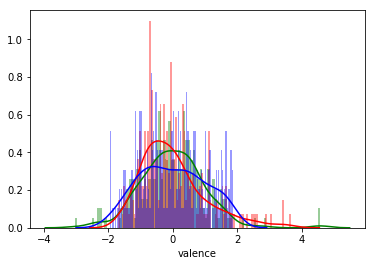

In [9]:
sns.distplot(scaled_df['polarity'], color='g', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(scaled_df['positivity'], color='r', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(scaled_df['valence'], color='b', bins=100, hist_kws={'alpha': 0.4});

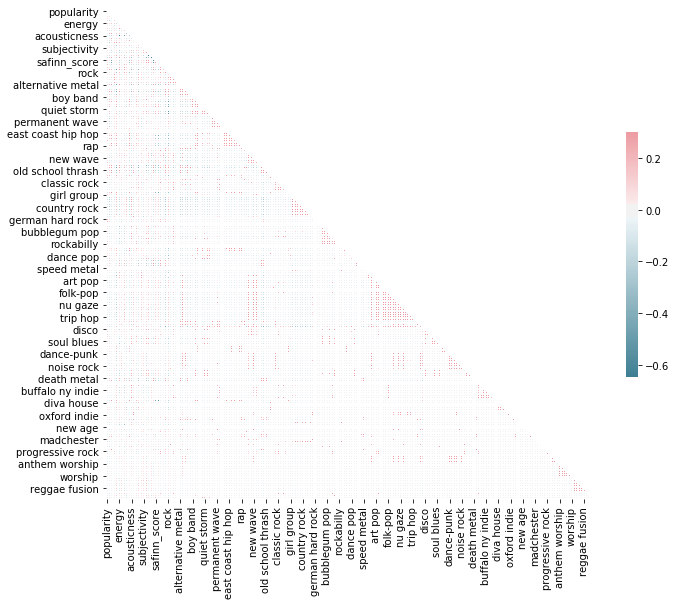

In [10]:
# Compute the correlation matrix
corr = scaled_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

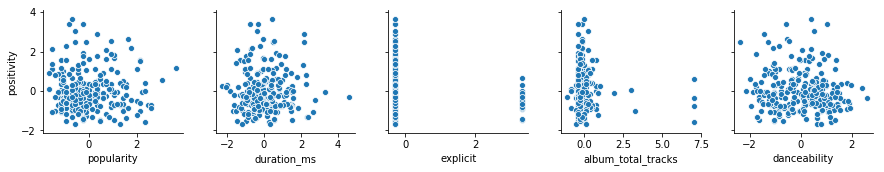

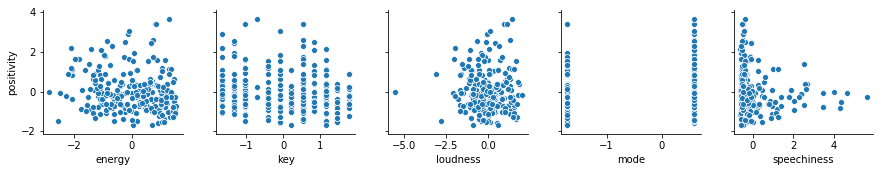

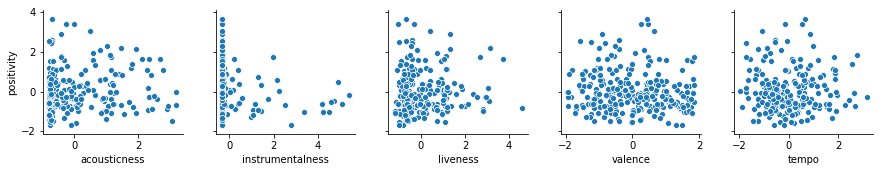

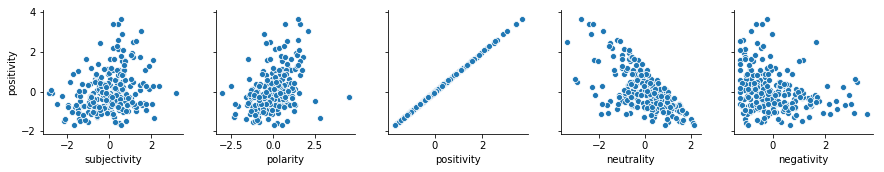

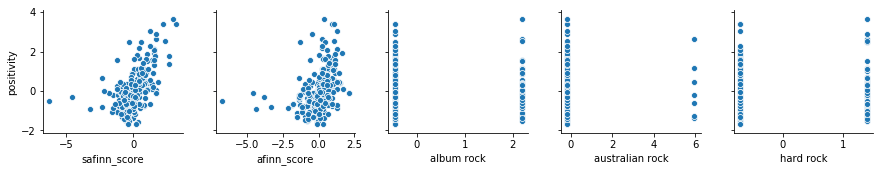

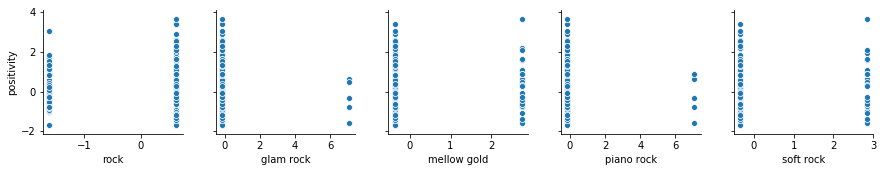

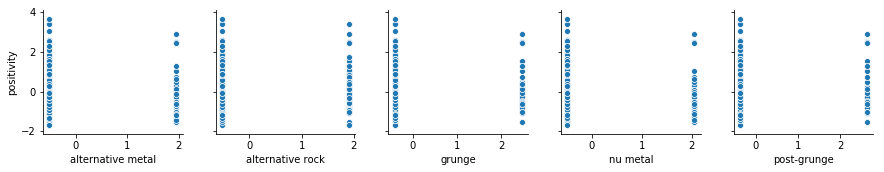

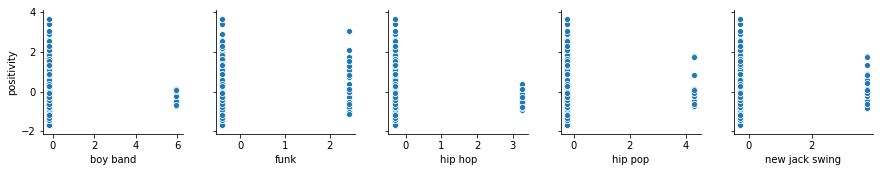

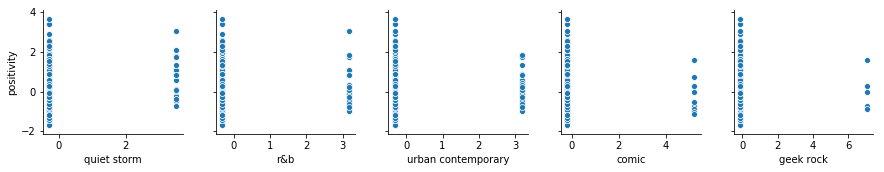

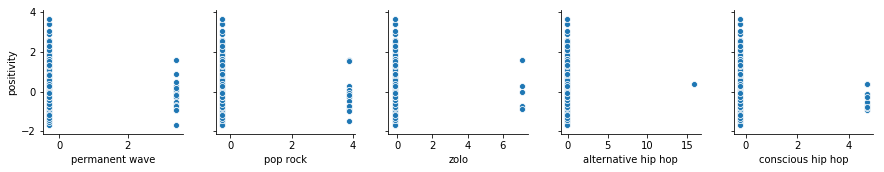

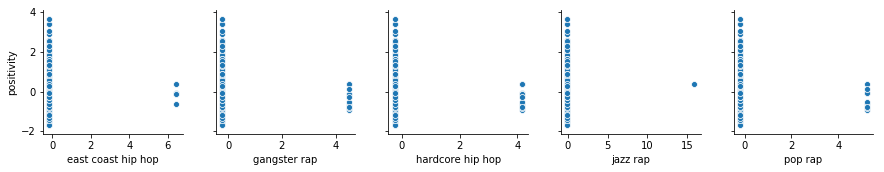

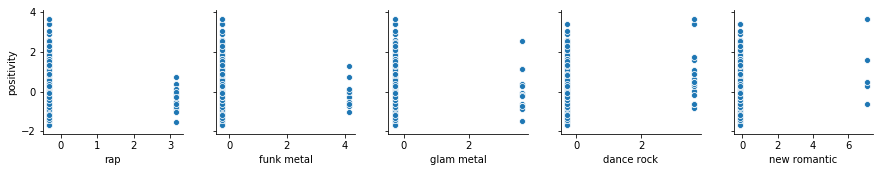

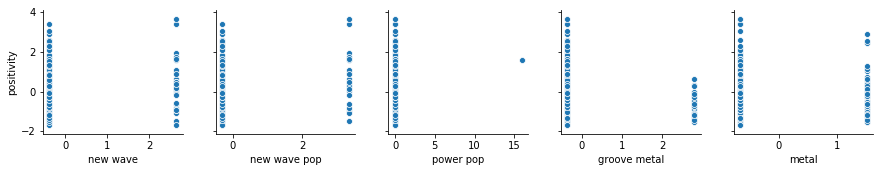

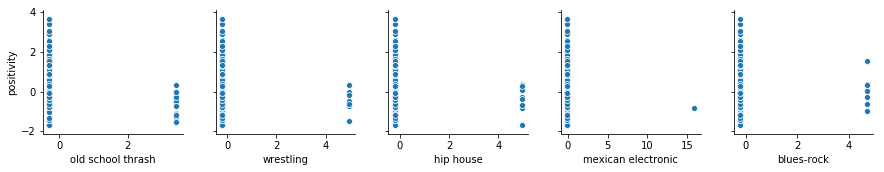

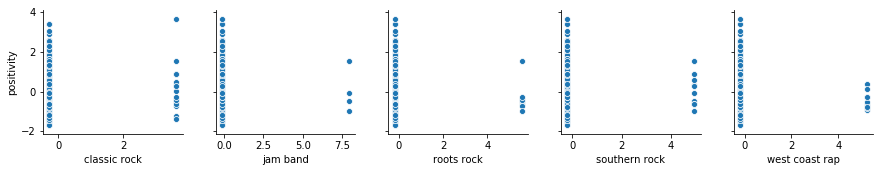

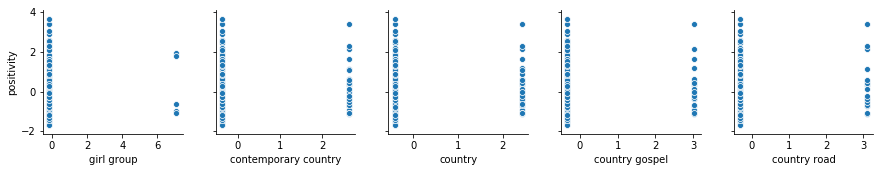

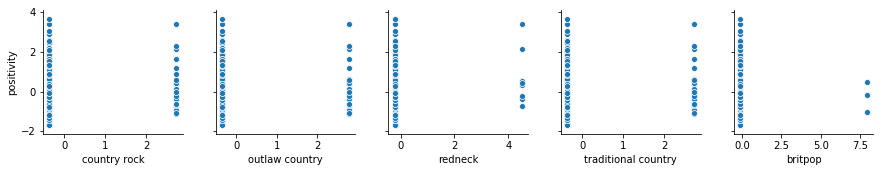

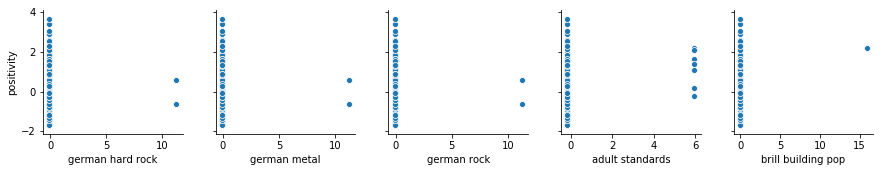

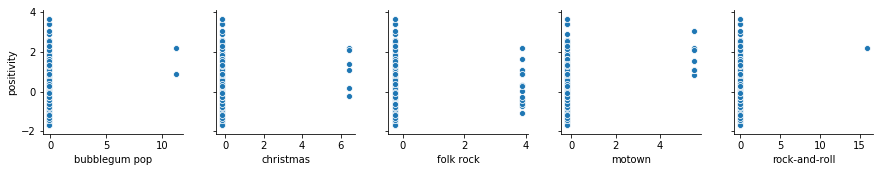

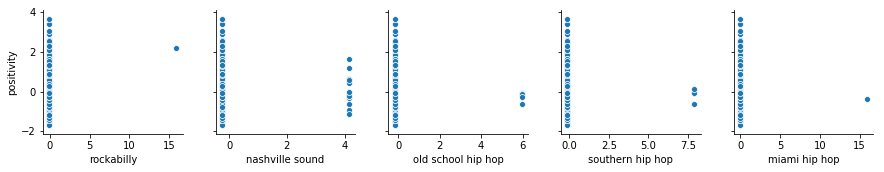

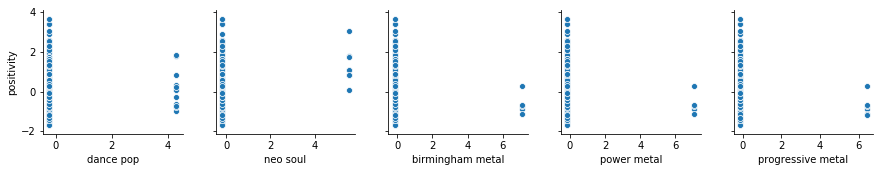

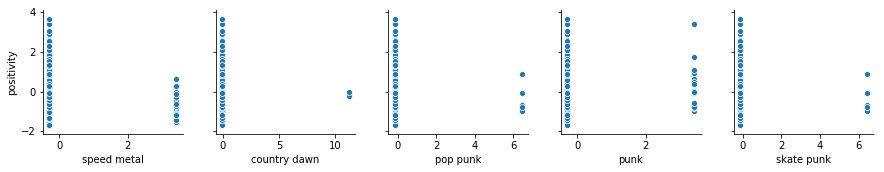

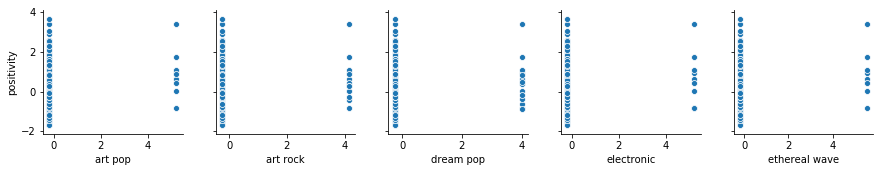

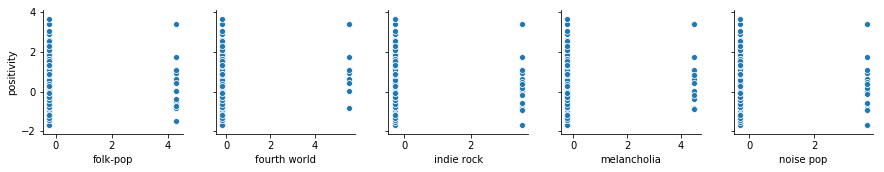

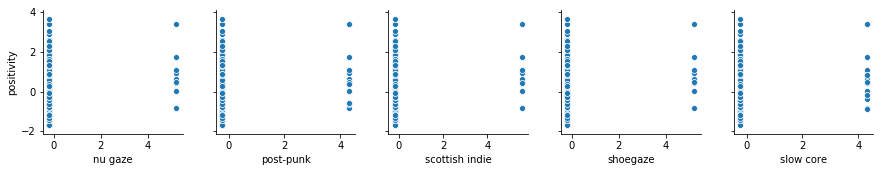

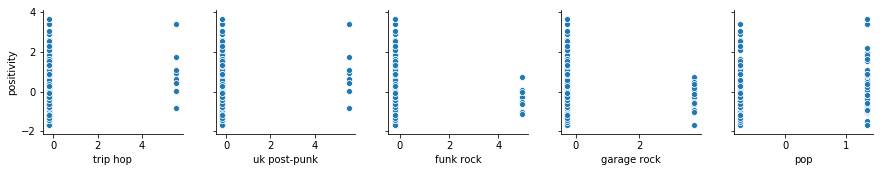

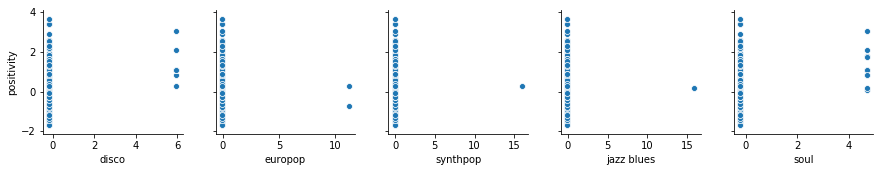

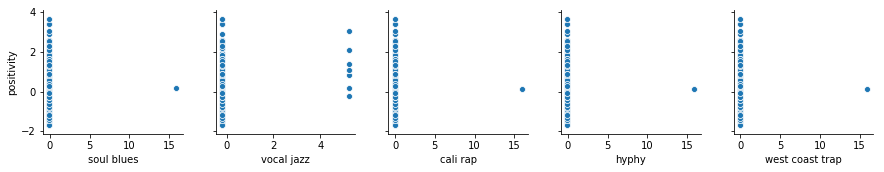

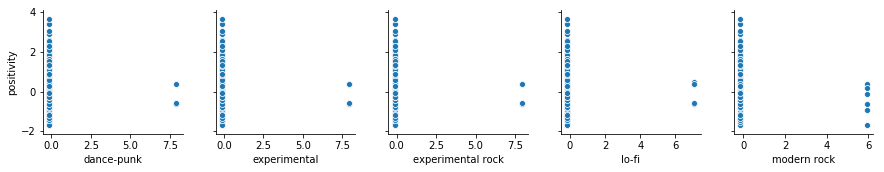

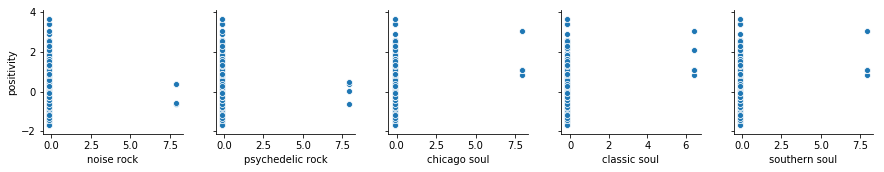

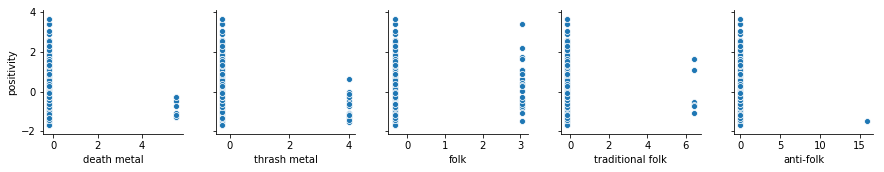

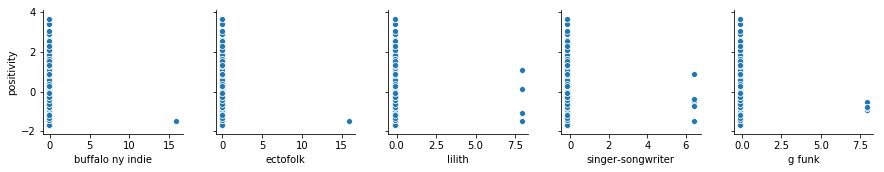

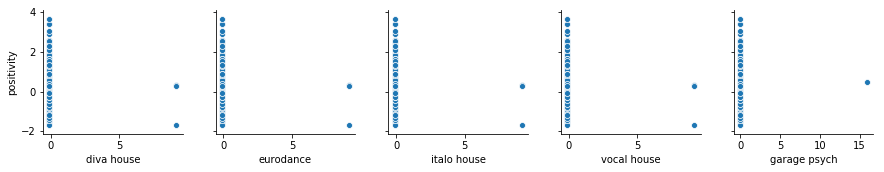

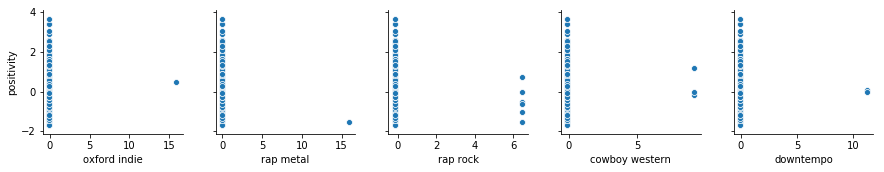

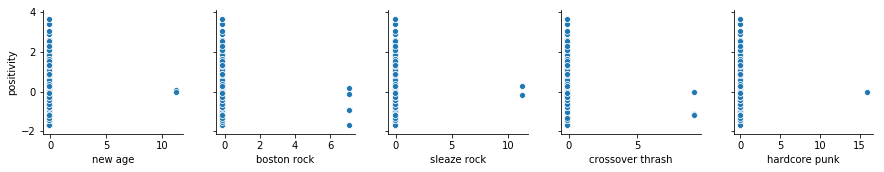

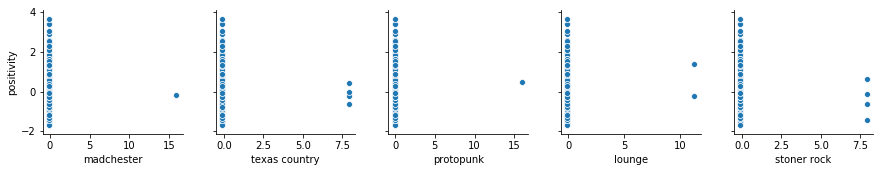

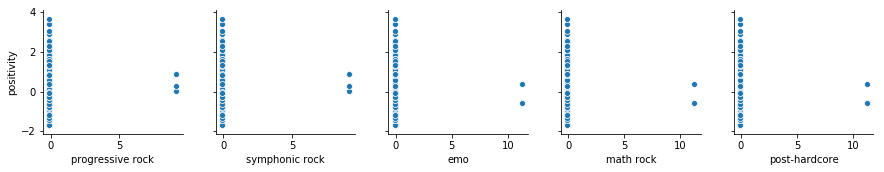

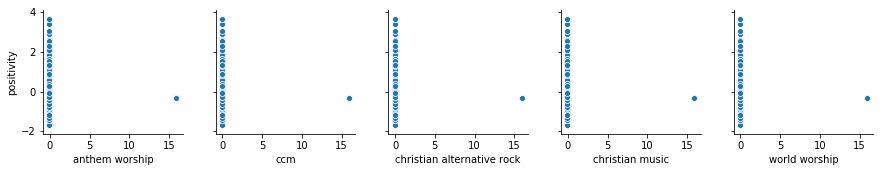

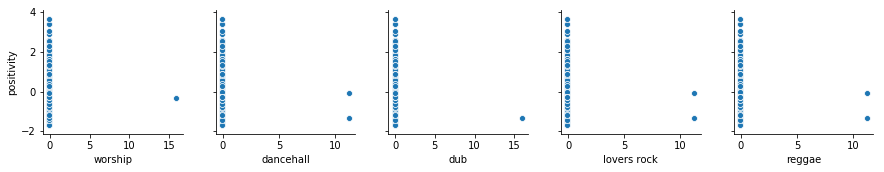

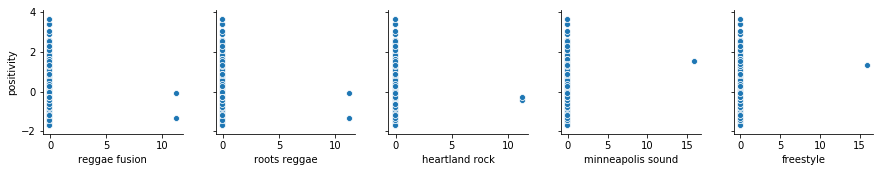

In [12]:
for i in range(0, len(scaled_df.columns), 5):
    sns.pairplot(data=scaled_df,
                x_vars=scaled_df.columns[i:i+5],
                y_vars=['positivity'])